### Automating Crypto Website API Pull Using Python | Data Analyst Project

https://coinmarketcap.com/api/

https://pro.coinmarketcap.com/account

https://coinmarketcap.com/api/documentation/v1/#

## Automating the Data Pull

In [7]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '8c42229d-1795-4b69-8bf2-7e20c7c99887',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)
  

{'status': {'timestamp': '2024-06-15T14:33:11.756Z', 'error_code': 0, 'error_message': None, 'elapsed': 34, 'credit_count': 1, 'notice': None, 'total_count': 10102}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11109, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'par



To load the data above, open anaconda promt and paste the text below and enter

jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10

In [8]:
type(data)

dict

In [9]:
import pandas as pd


pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [10]:
#df = pd.json_normalize(data['data'])
#df['timestamp']= pd.to_datetime('now')

df = pd.json_normalize(data['data'])   
df['Timestamp'] = pd.Timestamp('now')  
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,Timestamp
0,1,Bitcoin,BTC,bitcoin,11109,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.971237e+07,1.971237e+07,False,NaN,1,NaN,NaN,None,2024-06-15T14:32:00.000Z,66167.426875,2.315339e+10,-3.4851,-0.170327,-0.649549,-4.556358,0.409795,5.938085,-1.671589,1.304317e+12,53.9315,1.389516e+12,None,2024-06-15T14:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-15 15:33:15.920188
1,1027,Ethereum,ETH,ethereum,9064,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.201501e+08,1.201501e+08,True,NaN,2,NaN,NaN,None,2024-06-15T14:31:00.000Z,3556.970640,1.648339e+10,27.6480,-0.058189,2.264968,-3.499845,20.038323,16.004671,-0.895683,4.273703e+11,17.6604,4.273703e+11,None,2024-06-15T14:31:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-15 15:33:15.920188
2,825,Tether USDt,USDT,tether,88651,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.125599e+11,1.150845e+11,True,NaN,3,NaN,NaN,None,2024-06-15T14:31:00.000Z,0.999505,5.026042e+10,1.3126,0.008820,-0.004965,-0.015187,-0.071944,-0.125773,0.060956,1.125042e+11,4.6490,1.150275e+11,None,2024-06-15T14:31:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-06-15 15:33:15.920188
3,1839,BNB,BNB,bnb,2181,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.475841e+08,1.475841e+08,False,NaN,4,NaN,NaN,None,2024-06-15T14:31:00.000Z,604.786864,1.695170e+09,-2.1069,-0.634390,0.030071,-11.600755,5.275066,12.938864,4.678455,8.925695e+10,3.6884,8.925695e+10,None,2024-06-15T14:31:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-15 15:33:15.920188
4,5426,Solana,SOL,solana,682,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.616937e+08,5.781628e+08,True,NaN,5,NaN,NaN,None,2024-06-15T14:31:00.000Z,144.637881,1.907382e+09,0.8495,0.006688,-0.808018,-9.636032,-10.443946,8.817882,-24.634788,6.677840e+10,2.7595,8.362425e+10,None,2024-06-15T14:31:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-15 15:33:15.920188
5,3408,USDC,USDC,usd-coin,19735,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.241689e+10,3.241689e+10,False,NaN,6,NaN,NaN,None,2024-06-15T14:31:00.000Z,1.000047,4.776598e+09,-9.5219,-0.003355,0.007364,0.005399,-0.000622,-0.040198,-0.004304,3.241841e+10,1.3398,3.241841e+10,None,2024-06-15T14:31:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-06-15 15:33:15.920188
6,52,XRP,XRP,xrp,1340,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.557046e+10,9.998753e+10,False,NaN,7,NaN,NaN,None,2024-06-15T14:32:00.000Z,0.482859,9.217670e+08,-6.4210,0.246106,1.234112,-2.049492,-6.204461,-0.910389,-21.962923,2.683269e+10,1.1089,4.828588e+10,None,2024-06-15T14:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-15 15:33:15.920188
7,74,Dogecoin,DOGE,dogecoin,1005,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.447204e+11,1.447204e+11,True,NaN,8,NaN,NaN,None,2024-06-15T14:32:00.000Z,0.136457,8.287703e+08,29.8884,-0.267854,-2.865036,-6.131227,-9.826958,-10.881192,-9.581403,1.974810e+10,0.8166,1.974810e+10,None,2024-06-15T14:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-15 15:33:15.920188
8,11419,Toncoin,TON,toncoin,415,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,2.432897e

In [11]:
def api_runner():
    global df
    
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15', #'limit':'500'
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '8c42229d-1795-4b69-8bf2-7e20c7c99887',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

    
    #df2 = pd.json_normalize(data['data'])
    #df2['timestamp'] = pd.to_datetime('now')
    #df_append = pd.DataFrame(df2)
    #df = pd.concat([df2,df_append])
    
    
    df2 = pd.json_normalize(data['data'])   
    df2['Timestamp'] = pd.Timestamp('now')  # Instead of to_datetime()
    df_append = pd.DataFrame(df2)  # instead of df.append(df2)
    df = pd.concat([df,df_append]) 
    #df2

#Automating pull into csv
    #if not os.path.isfile(r'C:\Users\diana\Desktop\All Alex Tutorial\API.csv'):
        #df.to_csv(r'C:\Users\diana\Desktop\All Alex Tutorial\API.csv',header='column_names')
    #else:
        #df.to_csv(r'C:\Users\diana\Desktop\All Alex Tutorial\API.csv',mode='a',header=False)


In [12]:
import os
from time import time 
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner Fetch Completed')
    sleep(60) #sleep for 60 seconds
exit()

API Runner Fetch Completed
API Runner Fetch Completed


KeyboardInterrupt: 

In [13]:
#Automating pull into csv read
#df3 = pd.read_csv(r'C:\Users\diana\Desktop\All Alex Tutorial\API.csv')
#df3

In [14]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,Timestamp
0,1,Bitcoin,BTC,bitcoin,11109,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.971237e+07,1.971237e+07,False,NaN,1,NaN,NaN,None,2024-06-15T14:32:00.000Z,66167.426875,2.315339e+10,-3.4851,-0.170327,-0.649549,-4.556358,0.409795,5.938085,-1.671589,1.304317e+12,53.9315,1.389516e+12,None,2024-06-15T14:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-15 15:33:15.920188
1,1027,Ethereum,ETH,ethereum,9064,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.201501e+08,1.201501e+08,True,NaN,2,NaN,NaN,None,2024-06-15T14:31:00.000Z,3556.970640,1.648339e+10,27.6480,-0.058189,2.264968,-3.499845,20.038323,16.004671,-0.895683,4.273703e+11,17.6604,4.273703e+11,None,2024-06-15T14:31:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-15 15:33:15.920188
2,825,Tether USDt,USDT,tether,88651,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.125599e+11,1.150845e+11,True,NaN,3,NaN,NaN,None,2024-06-15T14:31:00.000Z,0.999505,5.026042e+10,1.3126,0.008820,-0.004965,-0.015187,-0.071944,-0.125773,0.060956,1.125042e+11,4.6490,1.150275e+11,None,2024-06-15T14:31:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-06-15 15:33:15.920188
3,1839,BNB,BNB,bnb,2181,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.475841e+08,1.475841e+08,False,NaN,4,NaN,NaN,None,2024-06-15T14:31:00.000Z,604.786864,1.695170e+09,-2.1069,-0.634390,0.030071,-11.600755,5.275066,12.938864,4.678455,8.925695e+10,3.6884,8.925695e+10,None,2024-06-15T14:31:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-15 15:33:15.920188
4,5426,Solana,SOL,solana,682,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.616937e+08,5.781628e+08,True,NaN,5,NaN,NaN,None,2024-06-15T14:31:00.000Z,144.637881,1.907382e+09,0.8495,0.006688,-0.808018,-9.636032,-10.443946,8.817882,-24.634788,6.677840e+10,2.7595,8.362425e+10,None,2024-06-15T14:31:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-15 15:33:15.920188
5,3408,USDC,USDC,usd-coin,19735,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.241689e+10,3.241689e+10,False,NaN,6,NaN,NaN,None,2024-06-15T14:31:00.000Z,1.000047,4.776598e+09,-9.5219,-0.003355,0.007364,0.005399,-0.000622,-0.040198,-0.004304,3.241841e+10,1.3398,3.241841e+10,None,2024-06-15T14:31:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-06-15 15:33:15.920188
6,52,XRP,XRP,xrp,1340,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.557046e+10,9.998753e+10,False,NaN,7,NaN,NaN,None,2024-06-15T14:32:00.000Z,0.482859,9.217670e+08,-6.4210,0.246106,1.234112,-2.049492,-6.204461,-0.910389,-21.962923,2.683269e+10,1.1089,4.828588e+10,None,2024-06-15T14:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-15 15:33:15.920188
7,74,Dogecoin,DOGE,dogecoin,1005,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.447204e+11,1.447204e+11,True,NaN,8,NaN,NaN,None,2024-06-15T14:32:00.000Z,0.136457,8.287703e+08,29.8884,-0.267854,-2.865036,-6.131227,-9.826958,-10.881192,-9.581403,1.974810e+10,0.8166,1.974810e+10,None,2024-06-15T14:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-15 15:33:15.920188
8,11419,Toncoin,TON,toncoin,415,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,2.432897e

## Transforming Data

In [15]:
pd.set_option('display.float_format',lambda x:'%.5f' % x) 
#pd.options.display.float_format = '{:,.2f}'.format #alternative

In [16]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,Timestamp
0,1,Bitcoin,BTC,bitcoin,11109,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19712371.00000,19712371.00000,False,NaN,1,NaN,NaN,None,2024-06-15T14:32:00.000Z,66167.42688,23153389450.36938,-3.48510,-0.17033,-0.64955,-4.55636,0.40980,5.93808,-1.67159,1304316866679.34351,53.93150,1389515964379.22998,None,2024-06-15T14:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-15 15:33:15.920188
1,1027,Ethereum,ETH,ethereum,9064,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120150089.71059,120150089.71059,True,NaN,2,NaN,NaN,None,2024-06-15T14:31:00.000Z,3556.97064,16483394261.52550,27.64800,-0.05819,2.26497,-3.49984,20.03832,16.00467,-0.89568,427370341489.43732,17.66040,427370341489.44000,None,2024-06-15T14:31:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-15 15:33:15.920188
2,825,Tether USDt,USDT,tether,88651,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,112559949271.11937,115084537326.48473,True,NaN,3,NaN,NaN,None,2024-06-15T14:31:00.000Z,0.99950,50260423791.02476,1.31260,0.00882,-0.00497,-0.01519,-0.07194,-0.12577,0.06096,112504211587.65736,4.64900,115027549511.95000,None,2024-06-15T14:31:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-06-15 15:33:15.920188
3,1839,BNB,BNB,bnb,2181,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,147584145.72873,147584145.72873,False,NaN,4,NaN,NaN,None,2024-06-15T14:31:00.000Z,604.78686,1695170304.04154,-2.10690,-0.63439,0.03007,-11.60075,5.27507,12.93886,4.67846,89256952721.02324,3.68840,89256952721.02000,None,2024-06-15T14:31:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-15 15:33:15.920188
4,5426,Solana,SOL,solana,682,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,461693709.92623,578162833.10386,True,NaN,5,NaN,NaN,None,2024-06-15T14:31:00.000Z,144.63788,1907381958.22747,0.84950,0.00669,-0.80802,-9.63603,-10.44395,8.81788,-24.63479,66778400031.61082,2.75950,83624247249.52000,None,2024-06-15T14:31:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-15 15:33:15.920188
5,3408,USDC,USDC,usd-coin,19735,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,32416886331.07671,32416886331.07671,False,NaN,6,NaN,NaN,None,2024-06-15T14:31:00.000Z,1.00005,4776598101.89418,-9.52190,-0.00336,0.00736,0.00540,-0.00062,-0.04020,-0.00430,32418414903.07673,1.33980,32418414903.08000,None,2024-06-15T14:31:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-06-15 15:33:15.920188
6,52,XRP,XRP,xrp,1340,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,55570463728.00000,99987531962.00000,False,NaN,7,NaN,NaN,None,2024-06-15T14:32:00.000Z,0.48286,921767011.22344,-6.42100,0.24611,1.23411,-2.04949,-6.20446,-0.91039,-21.96292,26832689646.80984,1.10890,48285883987.13000,None,2024-06-15T14:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-15 15:33:15.920188
7,74,Dogecoin,DOGE,dogecoin,1005,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,144720366383.70520,144720366383.70520,True,NaN,8,NaN,NaN,None,2024-06-15T14:32:00.000Z,0.13646,828770340.53940,29.88840,-0.26785,-2.86504,-6.13123,-9.82696,-10.88119,-9.58140,19748102422.81535,0.81660,19748102422.82000,None,2024-06-15T14:32:00.000Z,NaN,Na

In [17]:
df4 = df.groupby('name',sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df4

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.16736,-0.63107,-4.55727,0.39304,5.96406,-1.65941
Ethereum,-0.06715,2.31679,-3.51448,20.08216,16.01725,-0.91707
Tether USDt,0.00594,-0.02890,-0.02014,-0.07748,-0.12649,0.05958
BNB,-0.62572,0.04628,-11.60000,5.29257,12.93415,4.67024
Solana,0.01217,-0.78689,-9.63629,-10.41336,8.80278,-24.64873
USDC,-0.00457,-0.01554,0.00282,0.00135,-0.04161,-0.00693
XRP,0.23450,1.25222,-2.05833,-6.21295,-0.91103,-21.96034
Dogecoin,-0.29105,-2.86369,-6.15193,-9.84943,-10.87561,-9.57090
Toncoin,0.46682,2.64312,12.78809,22.21207,32.72678,113.87634


In [18]:
df5 = df4.stack()
df5

name                                     
Bitcoin      quote.USD.percent_change_1h     -0.16736
             quote.USD.percent_change_24h    -0.63107
             quote.USD.percent_change_7d     -4.55727
             quote.USD.percent_change_30d     0.39304
             quote.USD.percent_change_60d     5.96406
             quote.USD.percent_change_90d    -1.65941
Ethereum     quote.USD.percent_change_1h     -0.06715
             quote.USD.percent_change_24h     2.31679
             quote.USD.percent_change_7d     -3.51448
             quote.USD.percent_change_30d    20.08216
             quote.USD.percent_change_60d    16.01725
             quote.USD.percent_change_90d    -0.91707
Tether USDt  quote.USD.percent_change_1h      0.00594
             quote.USD.percent_change_24h    -0.02890
             quote.USD.percent_change_7d     -0.02014
             quote.USD.percent_change_30d    -0.07748
             quote.USD.percent_change_60d    -0.12649
             quote.USD.percent_change_90

In [19]:
type(df4)

pandas.core.frame.DataFrame

In [20]:
type(df5)

pandas.core.series.Series

In [21]:
df6 = df5.to_frame(name='values') #back to dataframe
df6

values
name                                              
Bitcoin     quote.USD.percent_change_1h   -0.16736
            quote.USD.percent_change_24h  -0.63107
            quote.USD.percent_change_7d   -4.55727
            quote.USD.percent_change_30d   0.39304
            quote.USD.percent_change_60d   5.96406
            quote.USD.percent_change_90d  -1.65941
Ethereum    quote.USD.percent_change_1h   -0.06715
            quote.USD.percent_change_24h   2.31679
            quote.USD.percent_change_7d   -3.51448
            quote.USD.percent_change_30d  20.08216
            quote.USD.percent_change_60d  16.01725
            quote.USD.percent_change_90d  -0.91707
Tether USDt quote.USD.percent_change_1h    0.00594
            quote.USD.percent_change_24h  -0.02890
            quote.USD.percent_change_7d   -0.02014
            quote.USD.percent_change_30d  -0.07748
            quote.USD.percent_change_60d  -0.12649
            quote.USD.percent_change_90d   0.05958
BNB         quote.USD.percent_change_1h   -0.62572
            quote.USD.percent_change_24h   0.04628
            quote.USD.percent_change_7d  -11.60000
            quote.USD.percent_change_30d   5.29257
            quote.USD.percent_change_60d  12.93415
            quote.USD.percent_change_90d   4.67024
Solana      quote.USD.percent_change_1h    0.01217
            quote.USD.percent_change_24h  -0.78689
            quote.USD.percent_change_7d   -9.63629
            quote.USD.percent_change_30d -10.41336
            quote.USD.percent_change_60d   8.80278
            quote.USD.percent_change_90d -24.64873
USDC        quote.USD.percent_change_1h   -0.00457
            quote.USD.percent_change_24h  -0.01554
            quote.USD.percent_change_7d    0.00282
            quote.USD.percent_change_30d   0.00135
            quote.USD.percent_change_60d  -0.04161
            quote.USD.percent_change_90d  -0.00693
XRP         quote.USD.percent_change_1h    0.23450
            quote.USD.percent_change_24h   1.25222
            quote.USD.percent_change_7d   -2.05833
            quote.USD.percent_change_30d  -6.21295
            quote.USD.percent_change_60d  -0.91103
            quote.USD.percent_change_90d -21.96034
Dogecoin    quote.USD.percent_change_1h   -0.29105
            quote.USD.percent_change_24h  -2.86369
            quote.USD.percent_change_7d   -6.15193
            quote.USD.percent_change_30d  -9.84943
            quote.USD.percent_change_60d -10.87561
            quote.USD.percent_change_90d  -9.57090
Toncoin     quote.USD.percent_change_1h    0.46682
            quote.USD.percent_change_24h   2.64312
            quote.USD.percent_change_7d   12.78809
            quote.USD.percent_change_30d  22.21207
            quote.USD.percent_change_60d  32.72678
            quote.USD.percent_change_90d 113.87634
Cardano     quote.USD.percent_change_1h   -0.12410
            quote.USD.percent_change_24h  -1.51802
            quote.USD.percent_change_7d   -5.72791
            quote.USD.percent_change_30d  -9.42542
            quote.USD.percent_change_60d  -9.92197
            quote.USD.percent_change_90d -39.57922
Shiba Inu   quote.USD.percent_change_1h   -0.37444
            quote.USD.percent_change_24h  -1.76198
            quote.USD.percent_change_7d  -10.59748
            quote.USD.percent_change_30d -15.27036
            quote.USD.percent_change_60d  -6.59183
            quote.USD.percent_change_90d -23.96838
Avalanche   quote.USD.percent_change_1h    0.04203
            quote.USD.percent_change_24h  -2.67766
            quote.USD.percent_change_7d   -6.61093
            quote.USD.percent_change_30d -11.69805
            quote.USD.percent_change_60d -11.76951
            quote.USD.percent_change_90d -45.13902
TRON        quote.USD.percent_change_1h   -0.12223
            quote.USD.percent_change_24h  -0.87216
            quote.USD.percent_change_7d    1.59756
            quote.USD.percent_change_30d  -7.93176
            quote.USD.percent_change_60d   4.50045
            quo

In [22]:
type(df6)

pandas.core.frame.DataFrame

In [23]:
df6.count()

values    90
dtype: int64

In [24]:
#index = pd.index(range(90))

In [25]:
df7 = df6.reset_index() #second run after the first one
df7

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.16736
1,Bitcoin,quote.USD.percent_change_24h,-0.63107
2,Bitcoin,quote.USD.percent_change_7d,-4.55727
3,Bitcoin,quote.USD.percent_change_30d,0.39304
4,Bitcoin,quote.USD.percent_change_60d,5.96406
5,Bitcoin,quote.USD.percent_change_90d,-1.65941
6,Ethereum,quote.USD.percent_change_1h,-0.06715
7,Ethereum,quote.USD.percent_change_24h,2.31679
8,Ethereum,quote.USD.percent_change_7d,-3.51448
9,Ethereum,quote.USD.percent_change_30d,20.08216


In [38]:
df8 = df7.rename(columns ={'level_1':'percent_change'})
df8

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.16736
1,Bitcoin,quote.USD.percent_change_24h,-0.63107
2,Bitcoin,quote.USD.percent_change_7d,-4.55727
3,Bitcoin,quote.USD.percent_change_30d,0.39304
4,Bitcoin,quote.USD.percent_change_60d,5.96406
5,Bitcoin,quote.USD.percent_change_90d,-1.65941
6,Ethereum,quote.USD.percent_change_1h,-0.06715
7,Ethereum,quote.USD.percent_change_24h,2.31679
8,Ethereum,quote.USD.percent_change_7d,-3.51448
9,Ethereum,quote.USD.percent_change_30d,20.08216


In [39]:
df8['percent_change']=df8['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df8

,name,percent_change,values
0,Bitcoin,1h,-0.16736
1,Bitcoin,24h,-0.63107
2,Bitcoin,7d,-4.55727
3,Bitcoin,30d,0.39304
4,Bitcoin,60d,5.96406
5,Bitcoin,90d,-1.65941
6,Ethereum,1h,-0.06715
7,Ethereum,24h,2.31679
8,Ethereum,7d,-3.51448
9,Ethereum,30d,20.08216


## Visualizing Data

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\diana\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  """Call fig.tight_layout within rect that exclude the legend."""


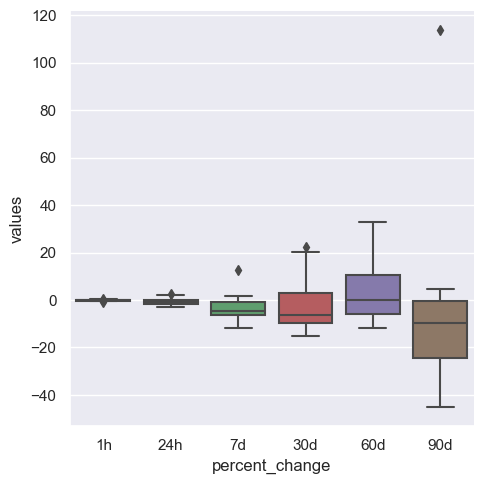

In [61]:

#sns.catplot(x='percent_change', y='values',hue='name',data=df8,kind='point')
sns.catplot(data=df8, x='percent_change', y="values", kind="box")


In [52]:
df9 = df[['name','quote.USD.price','Timestamp']]
df9 = df9.query("name == 'Bitcoin'")
df9

,name,quote.USD.price,Timestamp
0,Bitcoin,66167.42688,2024-06-15 15:33:15.920188
15,Bitcoin,66167.42688,2024-06-15 15:33:18.829871
30,Bitcoin,66163.86544,2024-06-15 15:34:20.393223


<Axes: xlabel='Timestamp', ylabel='quote.USD.price'>

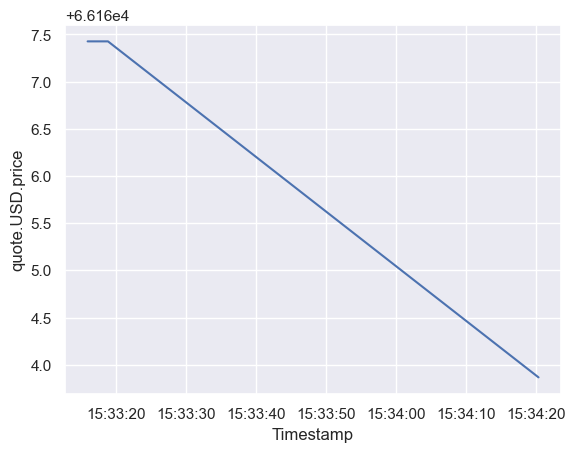

In [54]:
sns.set_theme(style='darkgrid')
sns.lineplot(x='Timestamp', y='quote.USD.price',data=df9)